# In this section we will be talking about classification problems
1. what types of classification problems do we have ?
* Binary classification problems
* Multi-class classification problems

* Binary classification ex: classification of dogs and cats images
* Multi-class classification ex : classification of multiple animals classes

### Later through this Part we will tackle another type of classification problems -> multi-label classification

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

X , y = make_circles(n_samples,noise=0.05,random_state=42)

In [3]:
len(X) , len(y)

(1000, 1000)

In [4]:
X[:5] , y[:5]

(array([[ 0.74220688,  0.24668576],
        [-0.7340323 ,  0.16869164],
        [-0.82985872,  0.22195899],
        [-0.42913559,  0.67223019],
        [ 0.44560223, -0.89493556]]),
 array([1, 1, 1, 1, 0], dtype=int64))

In [5]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2" : X[:,1],
                        "label": y})

In [6]:
circles.head(10)

,X1,X2,label
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0
5,-0.469885,0.708037,1
6,-0.016045,0.805623,1
7,0.759623,0.159526,1
8,-0.175692,-0.799837,1
9,-0.110616,1.042207,0


In [7]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

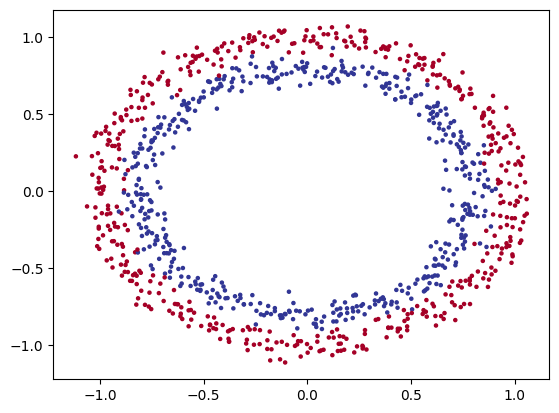

In [8]:
# visualisation
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],s=5,c=y,cmap=plt.cm.RdYlBu)

In [9]:
X.shape , y.shape

((1000, 2), (1000,))

In [10]:
# lets turn out data into tensors
import torch
print(torch.__version__)

type(X) , X.dtype

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

2.0.0+cu117


In [11]:
type(X) , X.dtype

(torch.Tensor, torch.float32)

In [12]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [13]:
len(X_train) , len(y_train) , len(X_test) , len(y_test)

(800, 800, 200, 200)

In [14]:
# building the model

import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [15]:
# lets build the model we will construct it with two linear layers

class CircleModelV0(nn.Module):
    def __init__(self):
        super(CircleModelV0,self).__init__()

        self.layer1 = nn.Linear(2,5)
        self.layer2 = nn.Linear(5,1)


    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.layer2(self.layer1(x))
    

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
# Sequential Method

model_0 = nn.Sequential(
    nn.Linear(2,5),
    nn.Linear(5,1),
    ).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
"""
X_test -> y_test
"""

untrained_preds = model_0(X_test.to(device))

print(f"this is the shape of the untrained models predictions : {untrained_preds.shape}")
print(f"this is the real targets shape : {y_test.shape}")

this is the shape of the untrained models predictions : torch.Size([200, 1])
this is the real targets shape : torch.Size([200])


In [18]:
print(f"this is the untrained model predictions : {untrained_preds[:5]}") 
# if we use torch.round we would get something similar to the real targets
print(f"this is the real targets : {y_test[:5]} ")

this is the untrained model predictions : tensor([[0.1767],
        [0.2952],
        [0.0232],
        [0.2268],
        [0.2314]], device='cuda:0', grad_fn=<SliceBackward0>)
this is the real targets : tensor([1., 0., 1., 0., 1.]) 
